# analysis of CCQE topology events from myVertex

In [151]:
import sys; sys.path.insert(0, '../../AnaTreesPackage/notebooks')
from notebooks_tools import * 
from matplotlib import ticker
import scipy.optimize as optimize
%matplotlib inline

# Truth CC1p pairs

In [2]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})
print len(GENIECC1p),'genie cc1p vertices'
recoGENIECC1p = GENIECC1p[GENIECC1p.IsVertexReconstructed==True]
print len(recoGENIECC1p),'fully reconstructed'

121541 genie cc1p vertices
8098 fully reconstructed


In [3]:
MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(MCevents),'2-tracks clusters from MC-BNB events'
MCeventsTrueCC1p = MCevents[MCevents.GENIECC1p==1]
MCeventsNonTrueCC1p = MCevents[MCevents.GENIECC1p!=1]
print len(MCeventsTrueCC1p), 'are true (GENIE) cc1p'

82131 2-tracks clusters from MC-BNB events
7306 are true (GENIE) cc1p


In [4]:
extBNB2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_extBNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(extBNB2tracks),'extBNB 2-tracks clusters'

13453 extBNB 2-tracks clusters


In [5]:
OpenCosmic2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_openCOSMIC_MC.csv')
print len(OpenCosmic2tracks),'OpenCosmic 2-tracks clusters'

20002 OpenCosmic 2-tracks clusters


In [6]:
samples = [MCeventsTrueCC1p , MCeventsNonTrueCC1p , extBNB2tracks[0:40000], OpenCosmic2tracks]
labels = ['MC-BNB true(GENIE) CC1p' , 'MC-BNB non CC1p' , 'ext-BNB 2-tracks clusters', 'open-cosmic MC']

# second question: how can we enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

In [7]:
def plot_feature_2tracks_clusters(var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),
                                  fig=None,do_add_legend=False,
                                  Nh=2,Nw=2,i=1):
    ax = fig.add_subplot(Nh,Nw,i)
    bins=bins
    for sample,label in zip(samples,labels):
        plt.hist(mul*sample[var],normed=1,label=label,bins=bins,histtype='step',linewidth=3)
    if do_add_legend:
        ax.legend(fontsize=15)
    set_axes(ax,x_label=x_label)

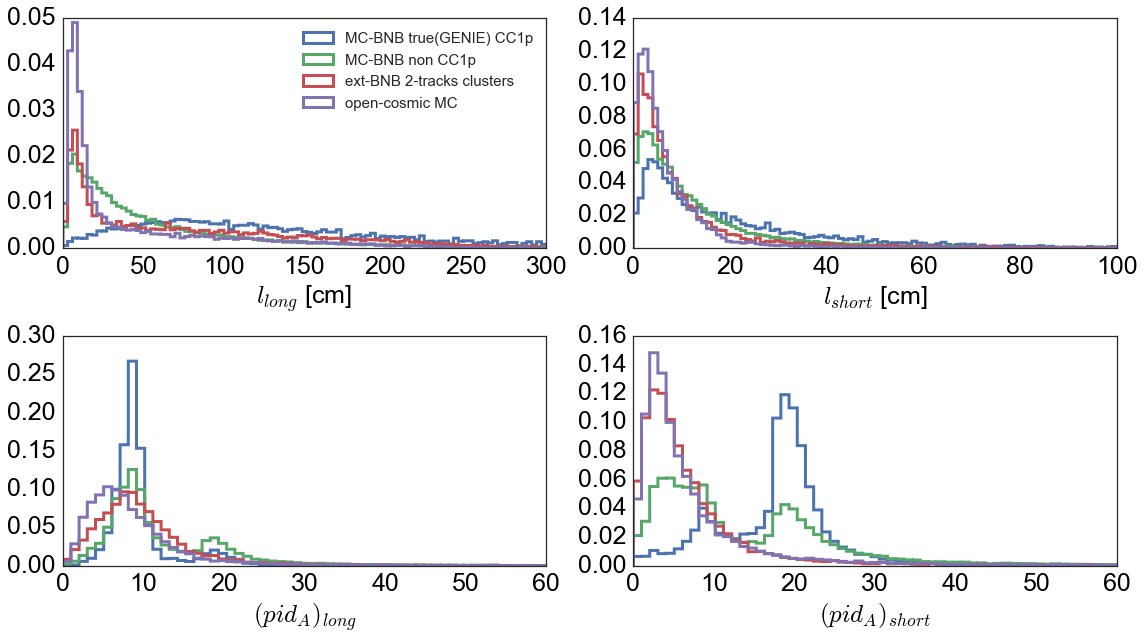

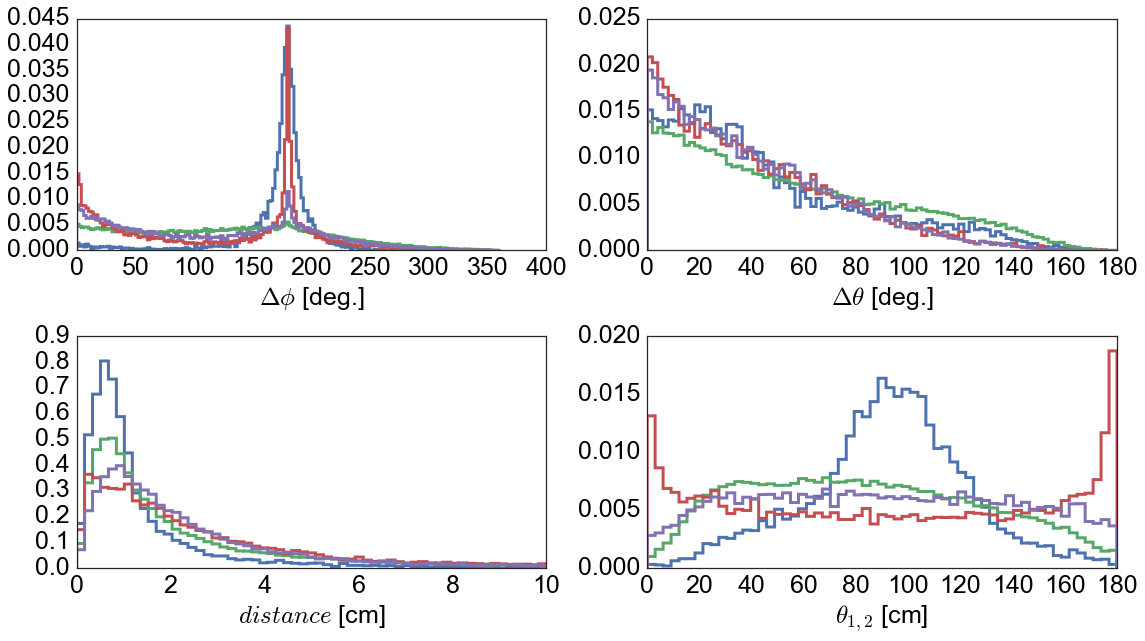

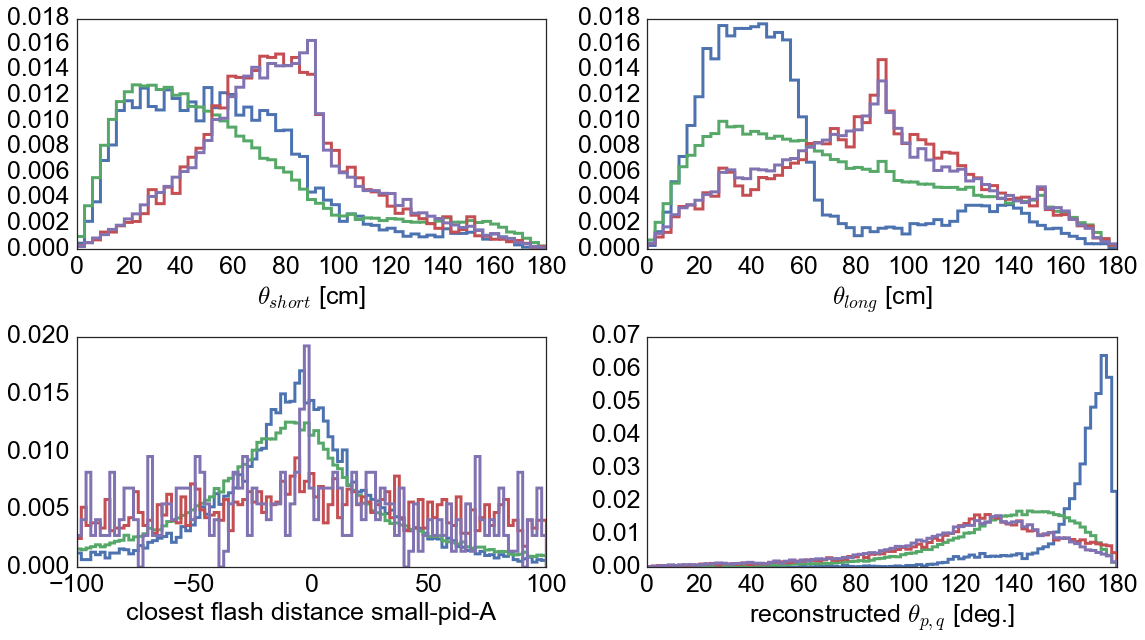

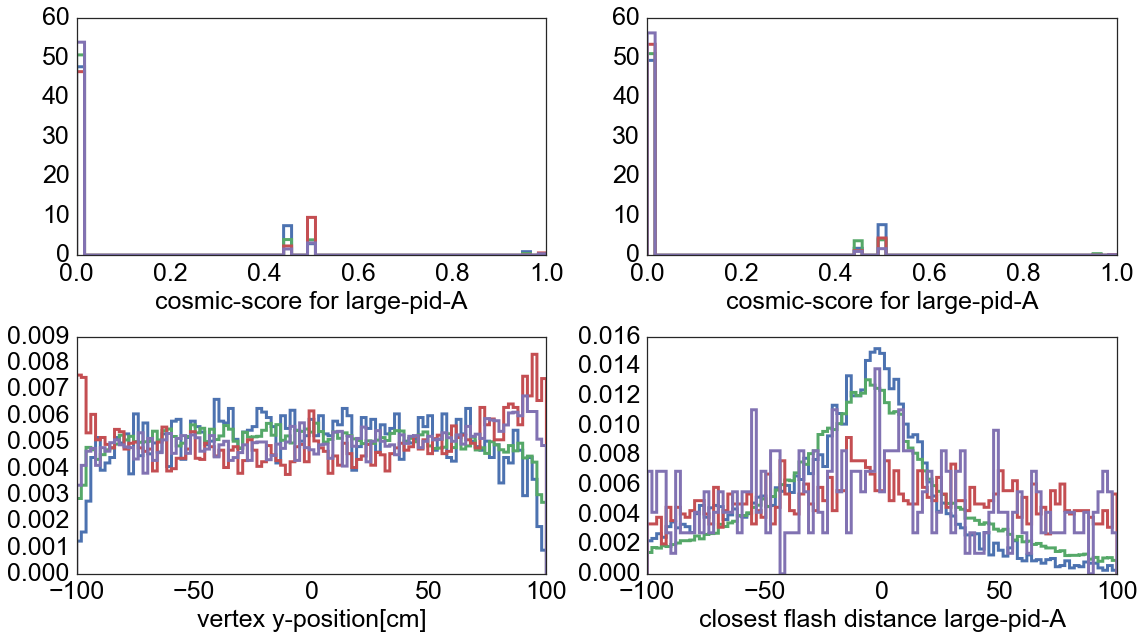

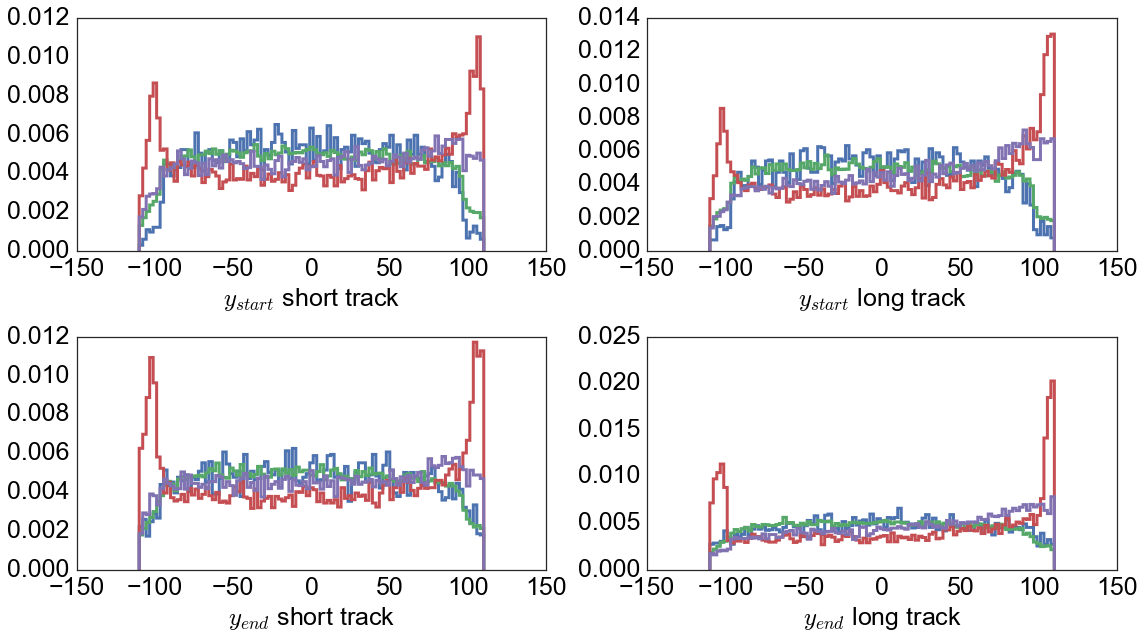

In [11]:
fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='l_long',x_label='$l_{long}$ [cm]',bins=np.linspace(0,300,100),do_add_legend=True,fig=fig)
plot_feature_2tracks_clusters(i=2,var='l_short',x_label='$l_{short}$ [cm]',bins=np.linspace(0,100,100),fig=fig)
plot_feature_2tracks_clusters(i=3,var='PIDA_long',x_label='$(pid_A)_{long}$',bins=np.linspace(0,60,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='PIDA_short',x_label='$(pid_A)_{short}$',bins=np.linspace(0,60,60),fig=fig)
plt.tight_layout()

fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',bins=np.linspace(0,360,180),fig=fig)
plot_feature_2tracks_clusters(i=2,var='delta_theta',x_label='$\\Delta \\theta$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plot_feature_2tracks_clusters(i=3,var='distance',x_label='$distance$ [cm]',bins=np.linspace(0,10,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='2_tracks_angle',x_label='$\\theta_{1,2}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plt.tight_layout()


fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='theta_long',x_label='$\\theta_{short}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plot_feature_2tracks_clusters(i=2,var='theta_short',x_label='$\\theta_{long}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plot_feature_2tracks_clusters(i=3,var='cfdistance_small_pida',x_label='closest flash distance small-pid-A',bins=np.linspace(-100,100,100),fig=fig)
plot_feature_2tracks_clusters(i=4,var='reco_CC1p_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plt.tight_layout()


fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='cosmicscore_large_pida',x_label='cosmic-score for large-pid-A',bins=np.linspace(0,1,60),fig=fig)
plot_feature_2tracks_clusters(i=2,var='cosmicscore_small_pida',x_label='cosmic-score for large-pid-A',bins=np.linspace(0,1,60),fig=fig)
plot_feature_2tracks_clusters(i=3,var='vertex_y',x_label='vertex y-position[cm]',bins=np.linspace(-100,100,100),fig=fig)
plot_feature_2tracks_clusters(i=4,var='cfdistance_large_pida',x_label='closest flash distance large-pid-A',bins=np.linspace(-100,100,100),fig=fig)
plt.tight_layout()

fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='starty_short',x_label='$y_{start}$ short track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=2,var='starty_long',x_label='$y_{start}$ long track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=3,var='endy_short',x_label='$y_{end}$ short track',bins=np.linspace(-110,110,100),fig=fig)
plot_feature_2tracks_clusters(i=4,var='endy_long',x_label='$y_{end}$ long track',bins=np.linspace(-110,110,100),fig=fig)

plt.tight_layout()




# efficiency and purity for all cuts in 1d

In [8]:
def get_fraction_in_cut( data=None , cut_var='distance', mul=1 , xmin=0.1, xmax=10 , Nbins=10 ,  cut_type= 'max' ):
    x_array = np.linspace(xmin,xmax,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for x in x_array:
        if cut_type is 'max':
            reduced = data[mul*data[cut_var]<x]
        elif cut_type is 'min':
            reduced = data[mul*data[cut_var]>x]
        numerator = float(len(reduced))
         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(x_array), np.array(frac) , np.array(frac_err)

In [9]:
def get_fraction_in_symmetriccut( data=None , cut_var='delta_phi', mul=1,xcenter=0.1, delta_x_min=0, delta_x_max=100 , Nbins=10 ):
    delta_x_array = np.linspace(delta_x_min,delta_x_max,Nbins)
    frac , frac_err = [] , []
    denominator = len(data)
    
    for delta_x in delta_x_array:
        reduced = data[np.abs(mul*data[cut_var]-xcenter)<delta_x]
        numerator = float(len(reduced))         
        frac.append(100 * numerator / denominator)
        frac_err.append( frac[-1] * np.sqrt(1./numerator + 1./denominator) ) if numerator>0 else frac_err.append( frac[-1]/np.sqrt(denominator) )
        
    return np.array(delta_x_array), np.array(frac) , np.array(frac_err)

In [15]:
def plot_cut_samples (cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]',
                      xcenter=0,figsize=(10,10),
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True):
    fig,ax=plt.subplots(figsize=figsize)
    for sample,label in zip(samples,labels):
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_eff = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_eff = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_eff , fmt='o' , label=label)
    if do_add_legend:
        ax.legend(fontsize=25,loc='best')
    ax.set_ylim(0,105)
    set_axes(ax,x_label=x_label,y_label='% of the original sample')

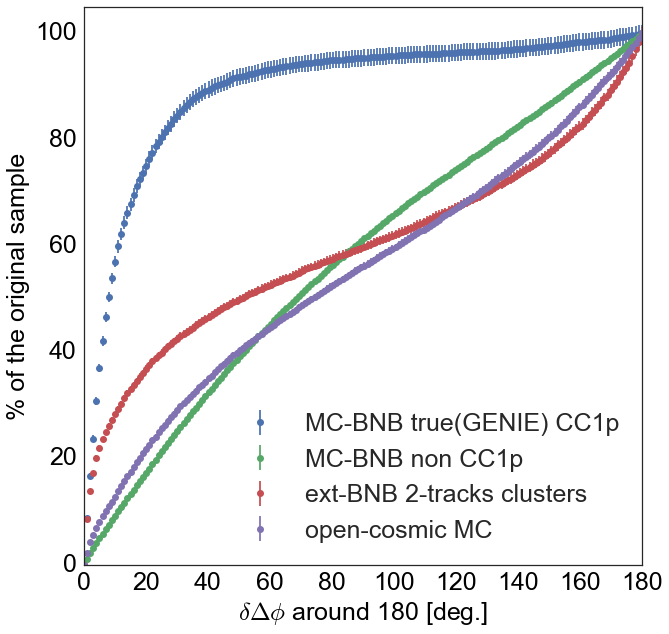

In [11]:
plot_cut_samples(cut_var ='delta_phi',                
                 cut_type= 'symmetric',
                 x_label = '$\\delta \\Delta \\phi$ around 180 [deg.]',
                 xcenter=180,
                 xmin=0., xmax=180 , Nbins=180)

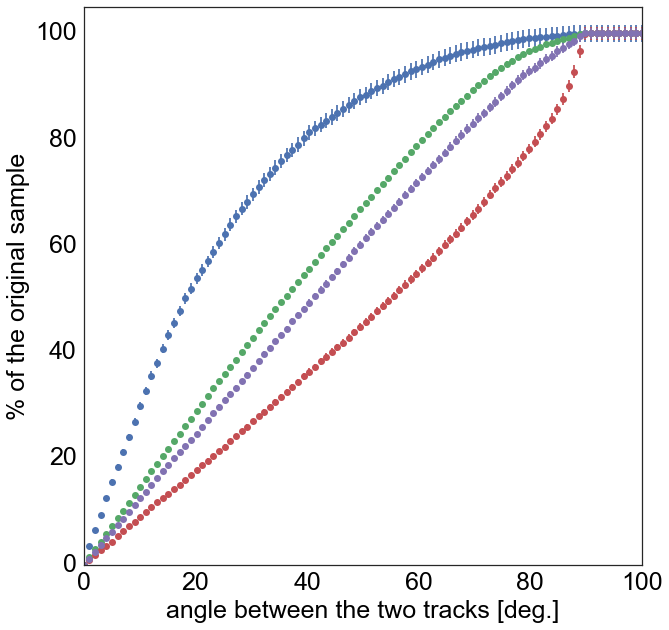

In [13]:
plot_cut_samples(cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,
                 cut_type= 'symmetric',
                 x_label = 'angle between the two tracks [deg.]',
                 xcenter=90,
                 xmin=0., xmax=100 , Nbins=100)

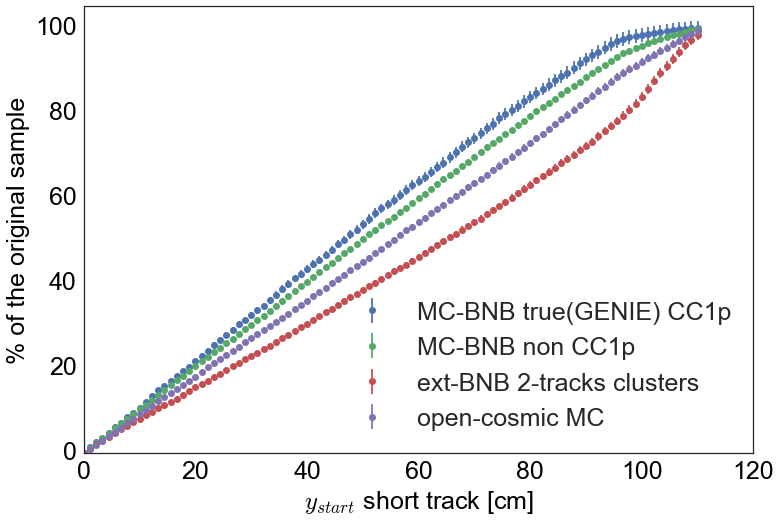

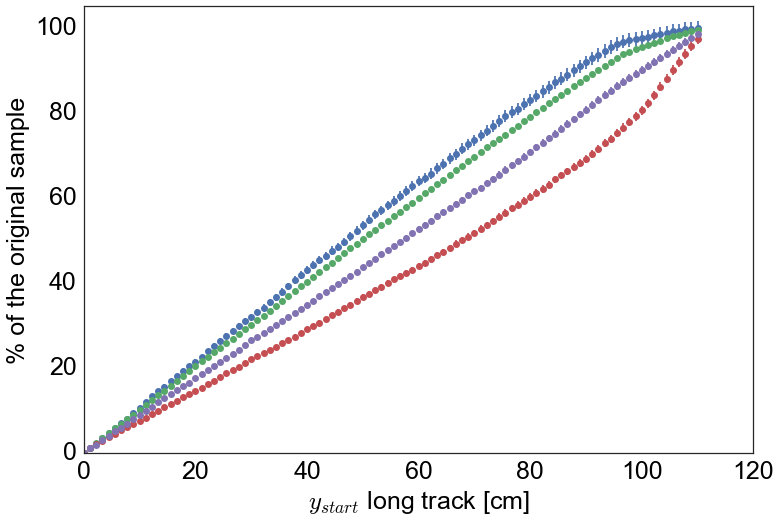

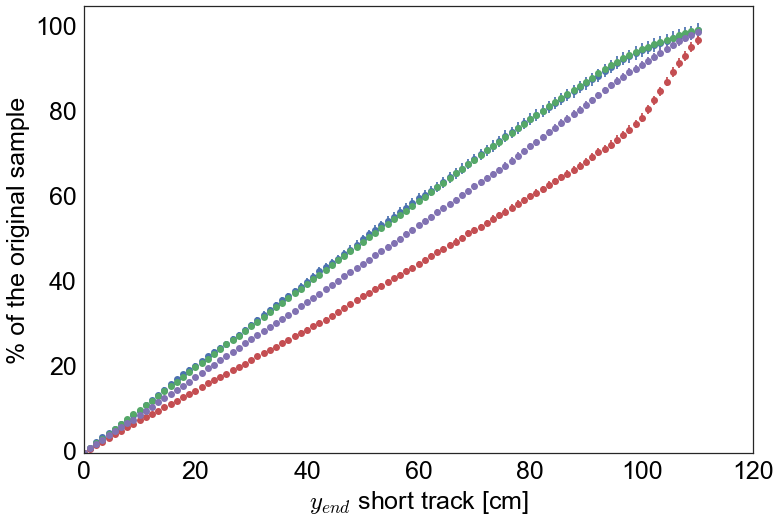

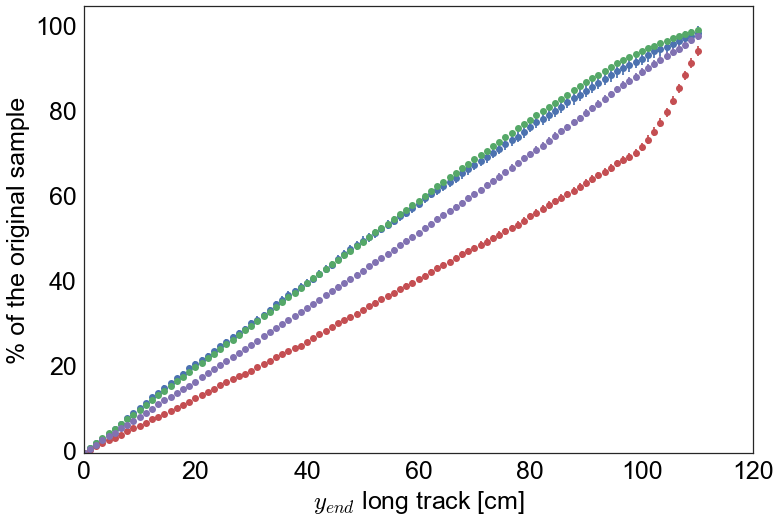

In [17]:
plot_cut_samples(cut_var ='starty_short',do_add_legend=True,figsize=(12,8),
                 cut_type= 'symmetric',
                 x_label = '$y_{start}$ short track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

plot_cut_samples(cut_var ='starty_long',do_add_legend=False,figsize=(12,8),                
                 cut_type= 'symmetric',
                 x_label = '$y_{start}$ long track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)


plot_cut_samples(cut_var ='endy_short',do_add_legend=False,figsize=(12,8),           
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ short track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

plot_cut_samples(cut_var ='endy_long',do_add_legend=False,figsize=(12,8),                
                 cut_type= 'symmetric',
                 x_label = '$y_{end}$ long track [cm]',
                 xcenter=0,
                 xmin=0., xmax=110 , Nbins=100)

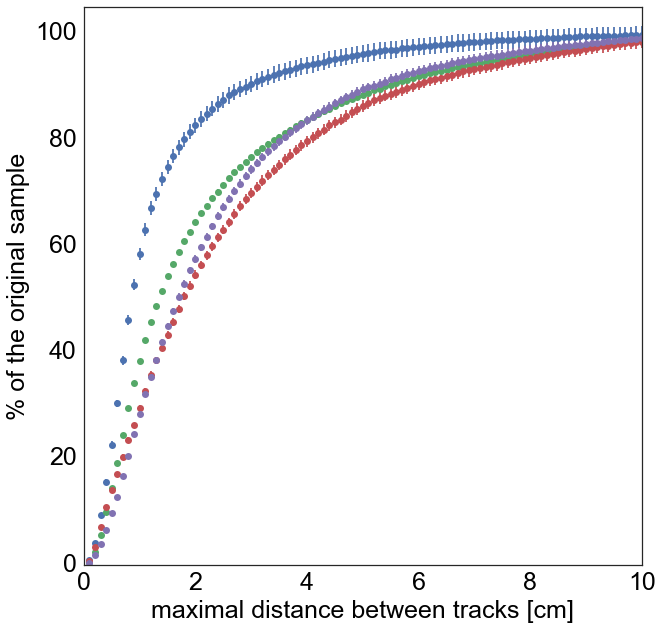

In [23]:
plot_cut_samples(cut_var ='distance',do_add_legend=False,
                 cut_type= 'max',                 
                 x_label = 'maximal distance between tracks [cm]',                 
                 xmin=0.1, xmax=10 , Nbins=100)

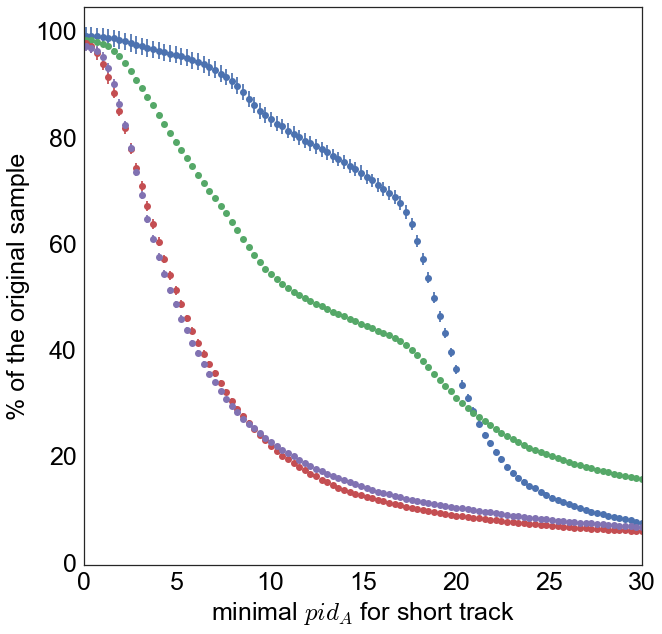

In [18]:
plot_cut_samples(cut_var ='PIDA_short', do_add_legend=False,               
                 cut_type= 'min',                 
                 x_label = 'minimal $pid_A$ for short track',                 
                 xmin=0.1, xmax=30 , Nbins=100)

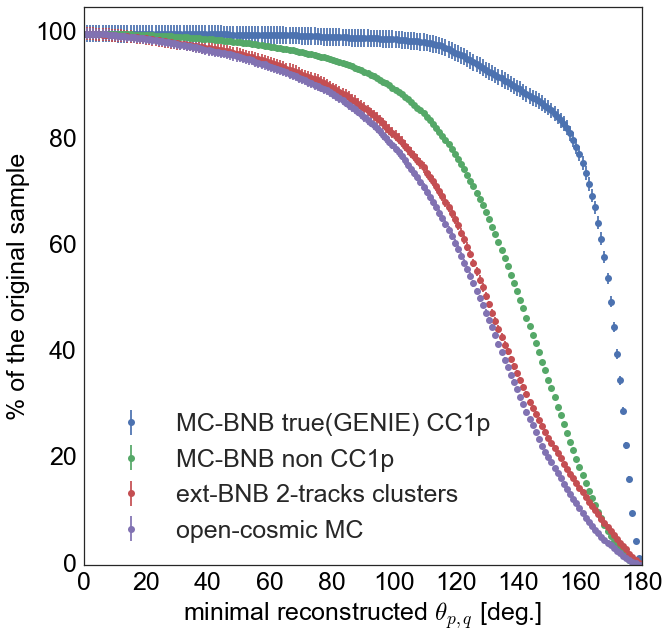

In [19]:
plot_cut_samples(cut_var ='reco_CC1p_theta_pq',                 
                 cut_type= 'min',                 
                 x_label = 'minimal reconstructed $\\theta_{p,q}$ [deg.]', 
                 xmin=0, xmax=180 , Nbins=180)

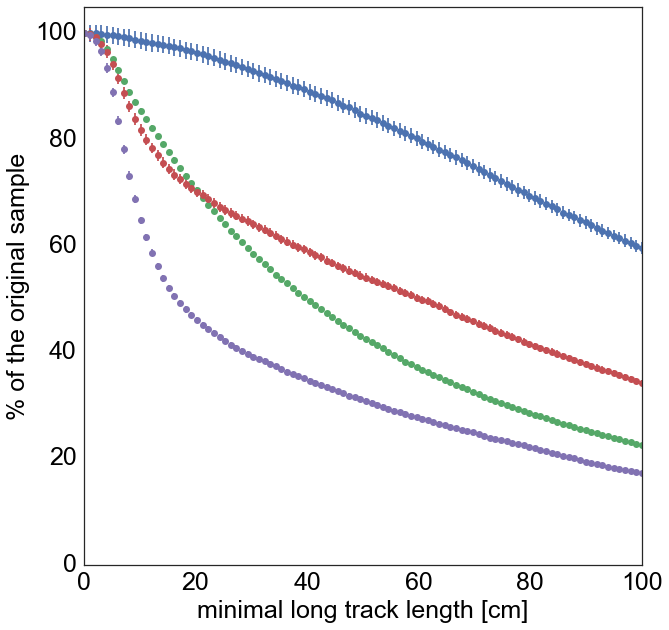

In [21]:
plot_cut_samples(cut_var ='l_long',do_add_legend=False,
                 cut_type= 'min',       
                 x_label = 'minimal long track length [cm]',                 
                 xmin=0.1, xmax=100 , Nbins=100)

In [258]:
def sample_in_selected_cut( data=None, label='' ,do_print=False
                           ,FV_y_max = 110 # [cm]
                           ,delta_Delta_phi = 180 # around 180 [deg.]
                           ,theta_pq_min = 0 # [deg.]
                           ,delta_cfdistance = 200 # closest flash distance [cm]
                           ,delta_2_tracks_angle = 100 # angle between the two tracks
                           ,minimal_PIDA_large_pida=0
                           ,minimal_length_long = 0 # [cm]
                          ):
#     print 'FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long:\n',FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long


    reduced = data[     
    # cosmic supression
    # define a new FV cut
        (np.fabs(data['starty_short']) < FV_y_max)        
        & (np.fabs(data['starty_long']) < FV_y_max)
        & (np.fabs(data['endy_short']) < FV_y_max)        
        & (np.fabs(data['endy_long']) < FV_y_max)

        
    # match the closest flash
        & (np.fabs(data['cfdistance_long']) < delta_cfdistance)
        & (np.fabs(data['cfdistance_short']) < delta_cfdistance)


    # QE physics
    # cut on delta \phi for QE topology
        & (np.fabs(data['delta_phi']-180) < delta_Delta_phi)
        
    # cut on reconstructed \theta(p,q) - this comes only from physics
        & ( data['reco_CC1p_theta_pq'] > theta_pq_min )
        
        
    # now, things that may come from broken cosmic tracks 
        # angle between the two tracks
        & ( np.fabs(180./np.pi*data['2_tracks_angle']-90) < delta_2_tracks_angle )
        
        # pid-A of the short track
        & ( data['PIDA_large_pida'] > minimal_PIDA_large_pida )
        
        # length of the long track
        & ( data['l_long'] > minimal_length_long )        
    ]    
    
    frac = 100 * len(reduced) / len(data)
    frac_err = frac * np.sqrt( 1./len(reduced) + 1./len(data) ) if len(reduced)>0 else frac / np.sqrt(len(data))
    if do_print: print label,"retained %.1f +/- %.1f"%(frac,frac_err)+ "% in this cut"
    return reduced , frac , frac_err

In [148]:
reduced,frac,frac_err = [], [] , []
for sample,label in zip(samples,labels):
    r,f,f_err = sample_in_selected_cut( data=sample, label=label 
                                           ,FV_y_max=105 # [cm]
                                           ,delta_Delta_phi = 50. # around 180 [deg.]
                                           ,theta_pq_min = 150 # [deg.]
                                           ,delta_cfdistance = 120 # closest flash distance [cm]
                                           ,delta_2_tracks_angle = 20
                                           ,minimal_PIDA_large_pida=10
                                           ,minimal_length_long = 0 # [cm]
                                          )
    
    reduced.append(r)
    frac.append(f)
    frac_err.append(f_err)

MC-BNB true(GENIE) CC1p retained 35.0 +/- 0.8% in this cut
MC-BNB non CC1p retained 3.0 +/- 0.1% in this cut
ext-BNB 2-tracks clusters retained 0.0 +/- 0.0% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut


# find golden point

1689


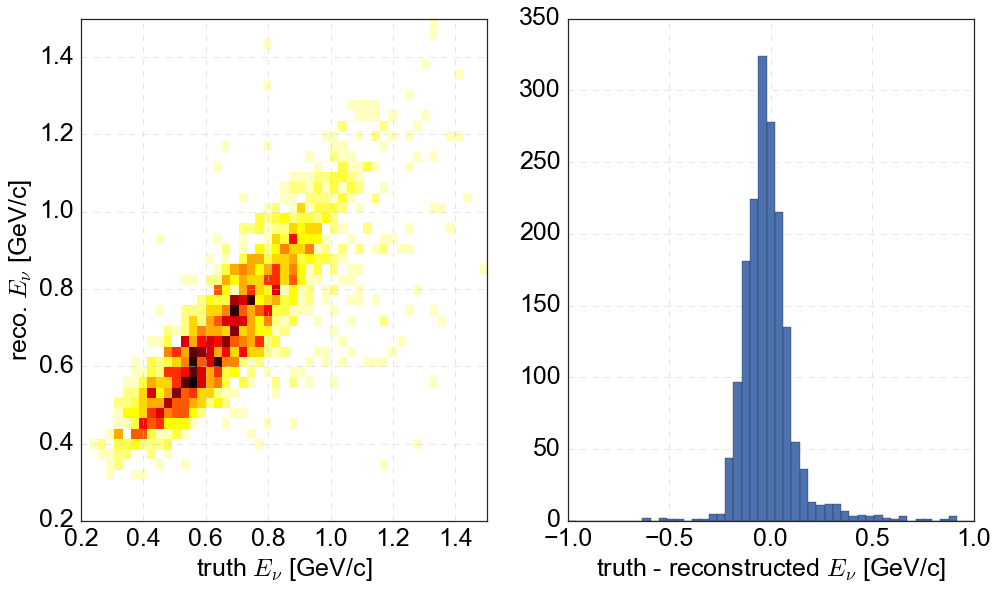

In [496]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(1,2,1)
print len(reduced[0])
plot_2d_hist(reduced[0].truth_Ev , reduced[0].reco_CC1p_Ev , bins=np.linspace(0.2,1.5,50), xlabel='truth $E_{\\nu}$ [GeV/c]', ylabel='reco. $E_{\\nu}$ [GeV/c]',ax=ax);
ax.grid(linestyle='--',alpha=0.5)
ax=fig.add_subplot(1,2,2)
plt.hist(reduced[0].truth_Ev - reduced[0].reco_CC1p_Ev , bins=np.linspace(-1.,1.,50));
set_axes(ax, x_label='truth - reconstructed $E_{\\nu}$ [GeV/c]')
ax.grid(linestyle='--',alpha=0.5)



In [214]:
def advance_min_max( x_min ,x_max, x_best):
    x_new_min = x_min + 0.5*(x_best-x_min)
    x_new_max = x_max - 0.5*(x_max-x_best)
    return x_new_min , x_new_max

In [261]:
def frac_in_cut(sample=None,x=None):
    # x is paramters...
    FV_y_max_best, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large, minimal_length_long = x
#     print 'FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long:\n',FV_y_max, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large_pida, minimal_length_long

    r,frac,f_err = sample_in_selected_cut( data=extBNB2tracks, label='' ,do_print=False
                                       ,FV_y_max=FV_y_max # [cm]                                       
                                       ,delta_Delta_phi = delta_Delta_phi # around 180 [deg.]                                       
                                       ,theta_pq_min = theta_pq_min # [deg.]                                       
                                       ,delta_cfdistance = delta_cfdistance # closest flash distance [cm]                                       
                                       ,delta_2_tracks_angle = delta_2_tracks_angle                                                                              
                                       ,minimal_PIDA_large_pida=minimal_PIDA_large_pida                                       
                                       ,minimal_length_long=minimal_length_long # [cm]                                       
                                      )
#     print frac
    return frac

In [246]:
def contribution_from_competing_channels(x):

    fextBNB = frac_in_cut(sample=extBNB2tracks,x=x)
    if fextBNB>0.001: return True
    fNonTrueCC1p = frac_in_cut(sample=MCeventsNonTrueCC1p,x=x)
    if fNonTrueCC1p>0.001: True
    return False

In [247]:
def print_new_best_max(x):
        FV_y_max_best, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large, minimal_length_long = x
        print 'found new best!'                             
        print                                 
        print 'new best parameters:'
        print FV_y_max_best, delta_Delta_phi_best, theta_pq_min_best, delta_2_tracks_angle_best , delta_cfdistance_best , minimal_PIDA_large_pida_best, minimal_length_long_best
        print labels[0],"retained %.1f +/- %.1f"%(fmax,fmax_err)+ "% in this cut"        
        print 

In [270]:

""" Simplex - a regression method for arbitrary nonlinear function minimization

Simplex minimizes an arbitrary nonlinear function of N variables by the
Nedler-Mead Simplex method as described in:

Nedler, J.A. and Mead, R. "A Simplex Method for Function Minimization." 
    Computer Journal 7 (1965): 308-313.

It makes no assumptions about the smoothness of the function being minimized.
It converges to a local minimum which may or may not be the global minimum
depending on the initial guess used as a starting point.
"""

import math
import copy

class Simplex:
    def __init__(self, testfunc, guess, increments, kR = -1, kE = 2, kC = 0.5):
        """Initializes the simplex.
        INPUTS
        ------
        testfunc      the function to minimize
        guess[]       an list containing initial guesses
        increments[]  an list containing increments, perturbation size
        kR            reflection constant
        kE            expansion constant
        kC            contraction constant
        """
        self.testfunc = testfunc
        self.guess = guess
        self.increments = increments
        self.kR = kR
        self.kE = kE
        self.kC = kC
        self.numvars = len(self.guess)


    def minimize(self, epsilon = 0.0001, maxiters = 250, monitor = 1, **kwargs):
        """Walks to the simplex down to a local minima.
        INPUTS
        ------
        epsilon       convergence requirement
        maxiters      maximum number of iterations
        monitor       if non-zero, progress info is output to stdout  

        OUTPUTS
        -------
        an array containing the final values
        lowest value of the error function
        number of iterations taken to get here
        """
        self.simplex = []

        self.lowest = -1
        self.highest = -1
        self.secondhighest = -1

        self.errors = []
        self.currenterror = 0
        # Initialize vertices
        for vertex in range(0, self.numvars + 3): # Two extras to store centroid and reflected point
            self.simplex.append(copy.copy(self.guess))
        # Use initial increments
        for vertex in range(0, self.numvars + 1):
            for x in range(0, self.numvars):
                if x == (vertex - 1):
                    self.simplex[vertex][x] = self.guess[x] + self.increments[x]
            self.errors.append(0)
        self.calculate_errors_at_vertices(**kwargs)

        iter = 0
        for iter in range(0, maxiters):
            # Identify highest, second highest, and lowest vertices
            self.highest = 0
            self.lowest = 0
            for vertex in range(0, self.numvars + 1):
                if self.errors[vertex] > self.errors[self.highest]:
                    self.highest = vertex
                if self.errors[vertex] < self.errors[self.lowest]:
                    self.lowest = vertex
            self.secondhighest = 0
            for vertex in range(0, self.numvars + 1):
                if vertex == self.highest:
                    continue
                if self.errors[vertex] > self.errors[self.secondhighest]:
                    self.secondhighest = vertex
            # Test for convergence
            S = 0.0
            S1 = 0.0
            for vertex in range(0, self.numvars + 1):
                S = S + self.errors[vertex]
            F2 = S / (self.numvars + 1)
            for vertex in range(0, self.numvars + 1):
                S1 = S1 + (self.errors[vertex] - F2)**2
            T = math.sqrt(S1 / self.numvars)
            
            # Optionally, print progress information
            if monitor:
		    print '#%d: Best = %f   Worst = %f' % (iter,self.errors[self.lowest],self.errors[self.highest]),
		    for vertex in range(0, self.numvars + 1):
			    print "[",
			    for x in range(0, self.numvars):
				print "%.2f" % self.simplex[vertex][x],
			    print "]",
		    print

                
            if T <= epsilon:   # We converged!  Break out of loop!
                break;
            else:                   # Didn't converge.  Keep crunching.
                # Calculate centroid of simplex, excluding highest vertex
                for x in range(0, self.numvars):
                    S = 0.0
                    for vertex in range(0, self.numvars + 1):
                        if vertex == self.highest:
                            continue
                        S = S + self.simplex[vertex][x]
                    self.simplex[self.numvars + 1][x] = S / self.numvars

                self.reflect_simplex()

                self.currenterror = self.testfunc(self.guess, **kwargs)

                if self.currenterror < self.errors[self.lowest]:
                    tmp = self.currenterror
                    self.expand_simplex()
                    self.currenterror = self.testfunc(self.guess, **kwargs)
                    if self.currenterror < tmp:
                        self.accept_expanded_point()
                    else:
                        self.currenterror = tmp
                        self.accept_reflected_point()

                elif self.currenterror <= self.errors[self.secondhighest]:
                    self.accept_reflected_point()

                elif self.currenterror <= self.errors[self.highest]:
                    self.accept_reflected_point()

                    self.contract_simplex()
                    self.currenterror = self.testfunc(self.guess, **kwargs)
                    if self.currenterror < self.errors[self.highest]:
                        self.accept_contracted_point()
                    else:
                        self.multiple_contract_simplex(**kwargs)

                elif self.currenterror >= self.errors[self.highest]:
                    self.contract_simplex()
                    self.currenterror = self.testfunc(self.guess, **kwargs)
                    if self.currenterror < self.errors[self.highest]:
                        self.accept_contracted_point()
                    else:
                        self.multiple_contract_simplex(**kwargs)

        # Either converged or reached the maximum number of iterations.
        # Return the lowest vertex and the currenterror.
        for x in range(0, self.numvars):
            self.guess[x] = self.simplex[self.lowest][x]
        self.currenterror = self.errors[self.lowest]
        return self.guess, self.currenterror, iter

    def contract_simplex(self):
        for x in range(0, self.numvars):
            self.guess[x] = self.kC * self.simplex[self.highest][x] + (1 - self.kC) * self.simplex[self.numvars + 1][x]
        return

    def expand_simplex(self):
        for x in range(0, self.numvars):
            self.guess[x] = self.kE * self.guess[x]                 + (1 - self.kE) * self.simplex[self.numvars + 1][x]
        return

    def reflect_simplex(self):
        for x in range(0, self.numvars):
            self.guess[x] = self.kR * self.simplex[self.highest][x] + (1 - self.kR) * self.simplex[self.numvars + 1][x]
            self.simplex[self.numvars + 2][x] = self.guess[x] # REMEMBER THE REFLECTED POINT
        return

    def multiple_contract_simplex(self, **kwargs):
        for vertex in range(0, self.numvars + 1):
            if vertex == self.lowest:
                continue
            for x in range(0, self.numvars):
                self.simplex[vertex][x] = 0.5 * (self.simplex[vertex][x] + self.simplex[self.lowest][x])
        self.calculate_errors_at_vertices(**kwargs)
        return

    def accept_contracted_point(self):
        self.errors[self.highest] = self.currenterror
        for x in range(0, self.numvars):
            self.simplex[self.highest][x] = self.guess[x]
        return

    def accept_expanded_point(self):
        self.errors[self.highest] = self.currenterror
        for x in range(0, self.numvars):
            self.simplex[self.highest][x] = self.guess[x]
        return

    def accept_reflected_point(self):
        self.errors[self.highest] = self.currenterror
        for x in range(0, self.numvars):
            self.simplex[self.highest][x] = self.simplex[self.numvars + 2][x]
        return

    def calculate_errors_at_vertices(self,**kwargs):
        for vertex in range(0, self.numvars + 1):
            if vertex == self.lowest:
                continue
            for x in range(0, self.numvars):
                self.guess[x] = self.simplex[vertex][x]
            self.currenterror = self.testfunc(self.guess, **kwargs)
            self.errors[vertex] = self.currenterror
        return




In [340]:
def max_eff_in_selected_cuts(x):
#     print x
    FV_y_max_best, delta_Delta_phi, theta_pq_min, delta_2_tracks_angle , delta_cfdistance , minimal_PIDA_large, minimal_length_long = x
    frac = []
    for i,sample,label in zip(range(len(samples)),samples,labels):
        r,f,f_err = sample_in_selected_cut( data=sample, label=label 
                                           ,FV_y_max=FV_y_max # [cm]
                                           ,delta_Delta_phi = delta_Delta_phi # around 180 [deg.]
                                           ,theta_pq_min = theta_pq_min # [deg.]
                                           ,delta_cfdistance = delta_cfdistance # closest flash distance [cm]
                                           ,delta_2_tracks_angle = delta_2_tracks_angle
                                           ,minimal_PIDA_large_pida=minimal_PIDA_large_pida
                                           ,minimal_length_long = minimal_length_long # [cm]
                                          )
        frac.append(f)

    print x
    print frac
    return -frac[0]*(100-frac[1]*frac[1]*frac[1]*frac[1]*frac[1])*(100-frac[2]*frac[2]*frac[2])*(100-frac[3]*frac[3]*frac[3])

In [341]:
def main():
    FV_y_max=100
    delta_Delta_phi = 50 # around 180 [deg.]
    theta_pq_min = 150 # [deg.]
    delta_cfdistance = 100 # closest flash distance [cm]
    delta_2_tracks_angle = 50
    minimal_PIDA_large_pida = 5
    minimal_length_long = 5 # [cm]

    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    s = Simplex(max_eff_in_selected_cuts, x, [3, 3, 3, 3, 3, 3, 3])
    values, err, iter = s.minimize(epsilon = 1, maxiters = 100, monitor = 0)
    del(s)
    print 'args = ', values
    print 'error = ', err
    print 'iterations = ', iter
    print 'fraction of TrueCC1p in best parameters:\n',frac_in_cut(sample=MCeventsTrueCC1p,x=values),'%'
    #     print_new_best_max(x=)#values)


if __name__ == '__main__':
    main()

[100, 50, 150, 100, 50, 5, 5]
[45, 10, 1, 0]
[103, 50, 150, 100, 50, 5, 5]
[45, 10, 1, 0]
[100, 53, 150, 100, 50, 5, 5]
[46, 11, 1, 0]
[100, 50, 153, 100, 50, 5, 5]
[45, 9, 0, 0]
[100, 50, 150, 103, 50, 5, 5]
[45, 10, 1, 0]
[100, 50, 150, 100, 53, 5, 5]
[47, 11, 1, 0]
[100, 50, 150, 100, 50, 8, 5]
[45, 10, 1, 0]
[100, 50, 150, 100, 50, 5, 8]
[45, 10, 0, 0]
[100.85714285714286, 50.85714285714286, 150.85714285714283, 100.85714285714286, 47.0, 5.857142857142858, 5.857142857142858]
[43, 9, 0, 0]
[101.28571428571429, 51.28571428571429, 151.28571428571425, 101.28571428571429, 44.0, 6.2857142857142865, 6.2857142857142865]
[41, 9, 0, 0]
[101.22448979591834, 47.36734693877551, 151.22448979591837, 101.22448979591834, 48.28571428571429, 6.224489795918368, 6.224489795918368]
[44, 9, 0, 0]
[101.57434402332362, 49.615160349854236, 151.5743440233236, 101.57434402332362, 47.79591836734694, 6.574344023323615, 2.7172011661807574]
[44, 10, 1, 0]
[102.02415660141605, 49.50520616409831, 152.02415660141605,

In [344]:
values = [110.46173780201906, 47.00266330775777, 159.5550709436318, 98.60078180219713, 17.54420340849873, 18.209610886618606, 9.903155727485172]
print 'fraction of TrueCC1p in best parameters:\n',frac_in_cut(sample=MCeventsTrueCC1p,x=values),'%'

fraction of TrueCC1p in best parameters:
0 %


In [213]:
N=10
fmax=0
for FV_y_max in np.linspace(90,110,N):
    for delta_Delta_phi in np.linspace(20,60,N):
        for theta_pq_min in np.linspace(140,160,N):
            for delta_cfdistance in np.linspace(80,130,N):
                for delta_2_tracks_angle in np.linspace(0,90,N):
                    for minimal_PIDA_large_pida in np.linspace(0,25,N):
                        for minimal_length_long in np.linspace(0,80,N):
                            
                            reduced,frac,frac_err = [], [] , []
                            found_new_max = False
                            good_point = True
                            
                            for i,sample,label in zip(range(len(samples)),samples,labels):
                                
                                if good_point is not True: continue
                                    
                                r,f,f_err = sample_in_selected_cut( data=sample, label=label,do_print=False
                                               ,FV_y_max=FV_y_max # [cm]
                                               ,delta_Delta_phi = delta_Delta_phi # around 180 [deg.]
                                               ,theta_pq_min = theta_pq_min # [deg.]
                                               ,delta_cfdistance = delta_cfdistance # closest flash distance [cm]
                                               ,delta_2_tracks_angle = delta_2_tracks_angle
                                               ,minimal_PIDA_large_pida=minimal_PIDA_large_pida
                                               ,minimal_length_long=minimal_length_long # [cm]
                                              )
                                frac.append(f)
                                frac_err.append(f_err)
                                
                                if i==0:
                                    if f>fmax:
                                        found_new_max = True
                                        fmax=f
                                        x_best = [FV_y_max, delta_Delta_phi , theta_pq_min , delta_cfdistance, delta_2_tracks_angle  ,minimal_PIDA_large_pida , minimal_length_long]
#                                         print label,"retained %.1f +/- %.1f"%(f,f_err)+ "% in this cut"
                                        frac_best = f
                                        frac_err_best = f_err

                               
                                if i!=0 and f>0.001: good_point = False
                                    

                            if found_new_max is True and good_point is True:
                                print 'found new best!'
                                print 
                                print 'new best parameters:',x_best                                
                                for i,label in zip(range(len(labels)),labels):
                                        print label,"retained %.1f +/- %.1f"%(frac[i],frac_err[i])+ "% in this cut"
                                print 


found new best!

new best parameters: [90.0, 20.0, 140.0, 80.0, 10.0, 0.0, 0.0]
MC-BNB true(GENIE) CC1p retained 11.0 +/- 0.4% in this cut
MC-BNB non CC1p retained 0.0 +/- 0.0% in this cut
ext-BNB 2-tracks clusters retained 0.0 +/- 0.0% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut



KeyboardInterrupt: 

In [192]:
def effiency_in_cut( parameters ):
    FV_y_max, delta_Delta_phi , theta_pq_min , delta_cfdistance, delta_2_tracks_angle  ,minimal_PIDA_large_pida , minimal_length_long = parameters
    print [FV_y_max, delta_Delta_phi , theta_pq_min , delta_cfdistance, delta_2_tracks_angle  ,minimal_PIDA_large_pida , minimal_length_long]
    reduced,frac,frac_err = [], [] , []
    for sample,label in zip(samples,labels):
        r,f,f_err = sample_in_selected_cut( data=sample, label=label,do_print=True
                                           ,FV_y_max=FV_y_max # [cm]
                                           ,delta_Delta_phi = delta_Delta_phi # around 180 [deg.]
                                           ,theta_pq_min = theta_pq_min # [deg.]
                                           ,delta_cfdistance = delta_cfdistance # closest flash distance [cm]
                                           ,delta_2_tracks_angle = delta_2_tracks_angle
                                           ,minimal_PIDA_large_pida=minimal_PIDA_large_pida
                                           ,minimal_length_long=minimal_length_long # [cm]
                                          )
    
        reduced.append(r)
        frac.append(f)
        frac_err.append(f_err)
    if frac[1]>0 or frac[2]>0 or frac[3]>0:
        print FV_y_max* delta_Delta_phi* theta_pq_min*delta_cfdistance* delta_2_tracks_angle*minimal_PIDA_large_pida
        print 
        return FV_y_max* delta_Delta_phi* theta_pq_min*delta_cfdistance* delta_2_tracks_angle*minimal_PIDA_large_pida
    else: 
        print -frac[0]
        print 
        return -frac[0]

In [204]:
# x = np.linspace(0,100,10)
FV_y_max = np.linspace(90,110,10)
result = optimize.minimize(effiency_in_cut, [100,80,110,100,90,1,1],tol=1e-1, 
                           bounds=((0.1,111),(0.1,90),(100,180),(0.1,200),(0,100),(0.1,60),(0.1,50)))#, bounds=((0,0,0,0,0,0,0), (None,None,None,None,None,None,None)))
print result

[100.0, 80.0, 110.0, 100.0, 90.0, 1.0, 1.0]
MC-BNB true(GENIE) CC1p retained 68.0 +/- 1.2% in this cut
MC-BNB non CC1p retained 42.0 +/- 0.3% in this cut
ext-BNB 2-tracks clusters retained 3.0 +/- 0.1% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut
7920000000.0

[100.00000000999999, 80.0, 110.0, 100.0, 90.0, 1.0, 1.0]
MC-BNB true(GENIE) CC1p retained 68.0 +/- 1.2% in this cut
MC-BNB non CC1p retained 42.0 +/- 0.3% in this cut
ext-BNB 2-tracks clusters retained 3.0 +/- 0.1% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut
7920000000.79

[100.0, 80.000000009999994, 110.0, 100.0, 90.0, 1.0, 1.0]
MC-BNB true(GENIE) CC1p retained 68.0 +/- 1.2% in this cut
MC-BNB non CC1p retained 42.0 +/- 0.3% in this cut
ext-BNB 2-tracks clusters retained 3.0 +/- 0.1% in this cut
open-cosmic MC retained 0.0 +/- 0.0% in this cut
7920000000.99

[100.0, 80.0, 110.00000000999999, 100.0, 90.0, 1.0, 1.0]
MC-BNB true(GENIE) CC1p retained 68.0 +/- 1.2% in this cut
MC-BNB non CC1p retained

In [74]:
reduced[0][['run','subrun','event','vertex_x','vertex_y','vertex_z']]

,run,subrun,event,vertex_x,vertex_y,vertex_z
24,1,2287,45725,103.4620,-18.48440,989.5610
122,5,3256,65108,101.5580,-49.87300,633.0930
135,5,2840,56798,125.7050,-12.11890,409.3750
171,5,5202,104026,130.8390,-40.41480,649.4110
243,5,4371,87403,222.4440,37.24630,576.3430
265,5,8194,163865,151.0310,-44.51550,338.0870
270,7,899,17970,133.1400,15.94720,373.2120
280,4,5478,109554,53.6772,-22.52690,755.0460
341,6,9120,182397,21.4835,87.88720,433.9130
366,4,3153,63046,210.3660,-80.82400,259.6800


In [269]:
Nmax = 100
# intial ranges
FV_y_max_min, FV_y_max_max = 90 , 110
delta_Delta_phi_min, delta_Delta_phi_max = 20,60
theta_pq_min_min , theta_pq_min_max = 140,160
delta_cfdistance_min , delta_cfdistance_max = 80,130
delta_2_tracks_angle_min, delta_2_tracks_angle_max = 0,90
minimal_PIDA_large_pida_min,minimal_PIDA_large_pida_max = 0 , 25
minimal_length_long_min, minimal_length_long_max = 0 , 80

fmax = 0
FV_y_max=106.9
delta_Delta_phi = 43.6 # around 180 [deg.]
theta_pq_min = 157.6 # [deg.]
delta_cfdistance = 34.4 # closest flash distance [cm]
delta_2_tracks_angle = 95.83
minimal_PIDA_large_pida=19.89
minimal_length_long = 20 # [cm]
                                          

for i in range(Nmax):
    
    if i%(Nmax/10)==0: 
        print '%.0f'%(100.*float(i)/Nmax) + '%'
    
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
#     if contribution_from_competing_channels(x=x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p            
        FV_y_max_best = FV_y_max
        FV_y_max_min ,FV_y_max_max = advance_min_max( FV_y_max_min ,FV_y_max_max, FV_y_max_best)
        print_new_best_max(x)

    found_new_max = False

    # FV_y_max
    FV_y_max = np.random.uniform(FV_y_max_min ,FV_y_max_max)
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x=x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    
    print 'fTrueCC1p,fmax:',fTrueCC1p,fmax

    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p            
        FV_y_max_best = FV_y_max
        FV_y_max_min ,FV_y_max_max = advance_min_max( FV_y_max_min ,FV_y_max_max, FV_y_max_best)
        print_new_best_max(x)

    
    # delta_Delta_phi
    delta_Delta_phi = np.random.uniform(delta_Delta_phi_min, delta_Delta_phi_max)
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        delta_Delta_phi_best = delta_Delta_phi
        delta_Delta_phi_min ,delta_Delta_phi_max = advance_min_max( delta_Delta_phi_min ,delta_Delta_phi_max, delta_Delta_phi_best)
        print_new_best_max(x)


        
    # theta_pq_min   
    theta_pq_min = np.random.uniform(theta_pq_min_min,theta_pq_min_max)
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        theta_pq_min_best = theta_pq_min
        theta_pq_min_min ,theta_pq_min_max = advance_min_max( theta_pq_min_min ,theta_pq_min_max, theta_pq_min_best)
        print_new_best_max(x)



        
        
    # delta_cfdistance
    delta_cfdistance = np.random.uniform(delta_cfdistance_min , delta_cfdistance_max)
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        delta_cfdistance_best = delta_cfdistance
        delta_cfdistance_min ,delta_cfdistance_max = advance_min_max( delta_cfdistance_min ,delta_cfdistance_max, delta_cfdistance_best)
        print_new_best_max(x)



    
    # delta_2_tracks_angle
    delta_2_tracks_angle = np.random.uniform(delta_2_tracks_angle_min, delta_2_tracks_angle_max )
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        delta_2_tracks_angle_best = delta_2_tracks_angle
        delta_2_tracks_angle_min ,delta_2_tracks_angle_max = advance_min_max( delta_2_tracks_angle_min ,delta_2_tracks_angle_max, delta_2_tracks_angle_best)
        print_new_best_max(x)




    # minimal_PIDA_large_pida
    minimal_PIDA_large_pida = np.random.uniform(minimal_PIDA_large_pida_min,minimal_PIDA_large_pida_max)
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        minimal_PIDA_large_pida_best = minimal_PIDA_large_pida
        minimal_PIDA_large_pida_min ,minimal_PIDA_large_pida_max = advance_min_max( minimal_PIDA_large_pida_min ,minimal_PIDA_large_pida_max, minimal_PIDA_large_pida_best)
        print_new_best_max(x)




    # minimal_length_long
    minimal_length_long = np.random.uniform(minimal_length_long_min, minimal_length_long_max )
    x=[FV_y_max,delta_Delta_phi,theta_pq_min,delta_cfdistance,delta_2_tracks_angle,minimal_PIDA_large_pida,minimal_length_long]
    if contribution_from_competing_channels(x) is True: continue
    fTrueCC1p = frac_in_cut(sample=MCeventsTrueCC1p,x=x)                                        
    if fTrueCC1p>fmax:
        found_new_max, fmax = True, fTrueCC1p 
        minimal_length_long_best = minimal_length_long
        minimal_length_long_min ,minimal_length_long_max = advance_min_max( minimal_length_long_min ,minimal_length_long_max, minimal_length_long_best)
        print_new_best_max(x)


            
#     if found_new_max is True:    
#         print 'found new best!'                             
#         print                                 
#         print 'new best parameters:'
#         print FV_y_max_best, delta_Delta_phi_best, theta_pq_min_best, delta_2_tracks_angle_best , delta_cfdistance_best , minimal_PIDA_large_pida_best, minimal_length_long_best
#         print labels[0],"retained %.1f +/- %.1f"%(fmax,fmax_err)+ "% in this cut"        
#         print 
#         print_new_best_max(x)


print 'best parameters:'
print FV_y_max_best, delta_Delta_phi_best, theta_pq_min_best, delta_2_tracks_angle_best , delta_cfdistance_best , minimal_PIDA_large_pida_best, minimal_length_long_best
print labels[0],"retained %.1f"%fmax+ "% in this cut"        

0%
fTrueCC1p,fmax: 0 0
fTrueCC1p,fmax: 0 0
fTrueCC1p,fmax: 0 0
fTrueCC1p,fmax: 0 0
found new best!

new best parameters:
109.353014475 43.6704633202 157.690449471 34.4023330114 95.8362382534 19.898352021 70.6578135998
MC-BNB true(GENIE) CC1p retained 1.0 +/- 0.5% in this cut

fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
10%
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
20%
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
30%
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
40%
fTrueCC1p,fmax: 0 1
fTrueCC1p,fmax: 0 1
fTrueCC

In [6]:
def plot_pur_eff (cut_name='maximal distance between tracks',
                  cut_var ='distance',
                  cut_type= 'max',
                  x_label = 'maximal tracks distance [cm]',
                  xmin=0.1, xmax=10 , Nbins=10, y_lim=None):
    
    eff , eff_err , pur , pur_err = [] , [] ,  [] , []
    x_array = np.linspace(xmin,xmax,Nbins)

    for x in x_array:
        
        if cut_type is 'max':
            reduced_CC1p = truthCC1p[truthCC1p[cut_var]<x]
            reduced_MCevents = MCevents[MCevents[cut_var]<x]
            
        elif cut_type is 'min':
            reduced_CC1p = truthCC1p[truthCC1p[cut_var]>x]
            reduced_MCevents = MCevents[MCevents[cut_var]>x]

        reduced_MCevents_trueCC1p = reduced_MCevents[reduced_MCevents.truth_cc1p==1]



        denominator = len(truthCC1p) if len(truthCC1p)>0 else 1e20
        eff.append( 100.*float(len(reduced_CC1p))/len(truthCC1p) )
        den2 = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        eff_err.append( eff[-1]*np.sqrt( 1./denominator + 1./den2 ) )
        
        denominator = len(reduced_MCevents) if len(reduced_MCevents)>0 else 1e20
        pur.append( 100.*float(len(reduced_MCevents_trueCC1p))/denominator)
        den2 = len(reduced_MCevents_trueCC1p) if len(reduced_MCevents_trueCC1p)>0 else 1e20
        pur_err.append( pur[-1]*np.sqrt( 1./denominator + 1./den2 ) )


    fig, ax = plt.subplots(figsize=(16,9))
    plt.errorbar(x_array , y=eff, yerr=eff_err , fmt='o'  , label='CC1p selection efficiency')
    plt.errorbar(x_array , y=pur, yerr=pur_err , fmt='ro' , label='CC1p purity of selected sample'  )
    set_axes(ax,x_label=x_label, y_label='efficiency/purity [%]',fontsize=35 )

    ax.legend(loc='best',fontsize=25)
    if y_lim is not None:
        ax.set_ylim(0,101)
    ax.grid(linestyle='--',alpha=0.5)
    fig.tight_layout()



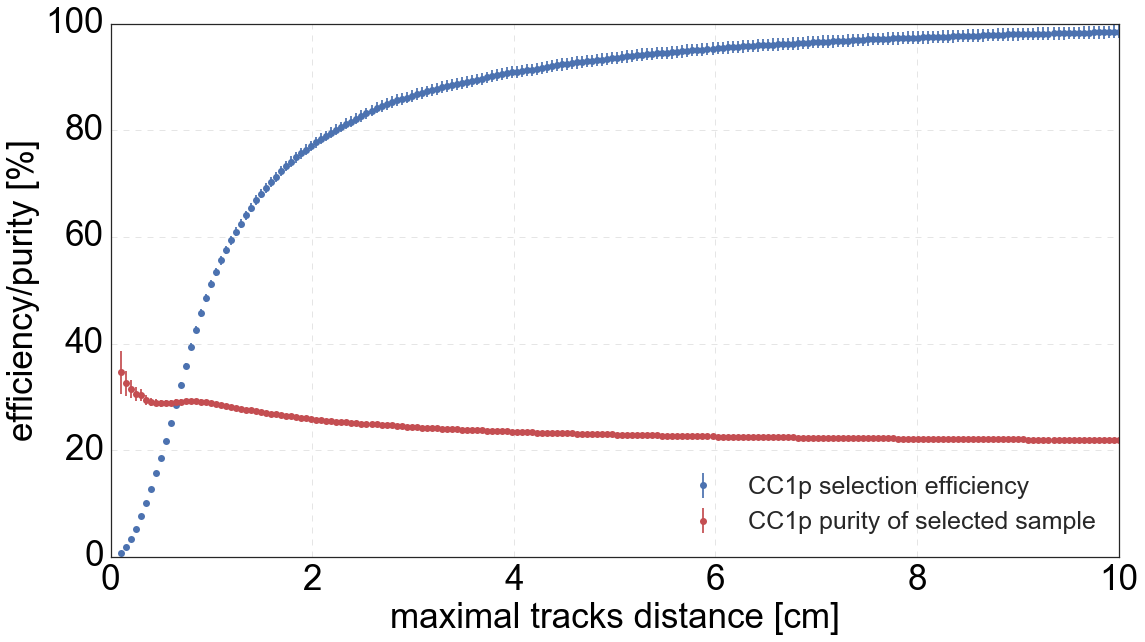

In [40]:
plot_pur_eff (    cut_var ='distance',
                  cut_type= 'max',
                  x_label = 'maximal tracks distance [cm]',
                  xmin=0.1, xmax=10 , Nbins=200, y_lim=None)

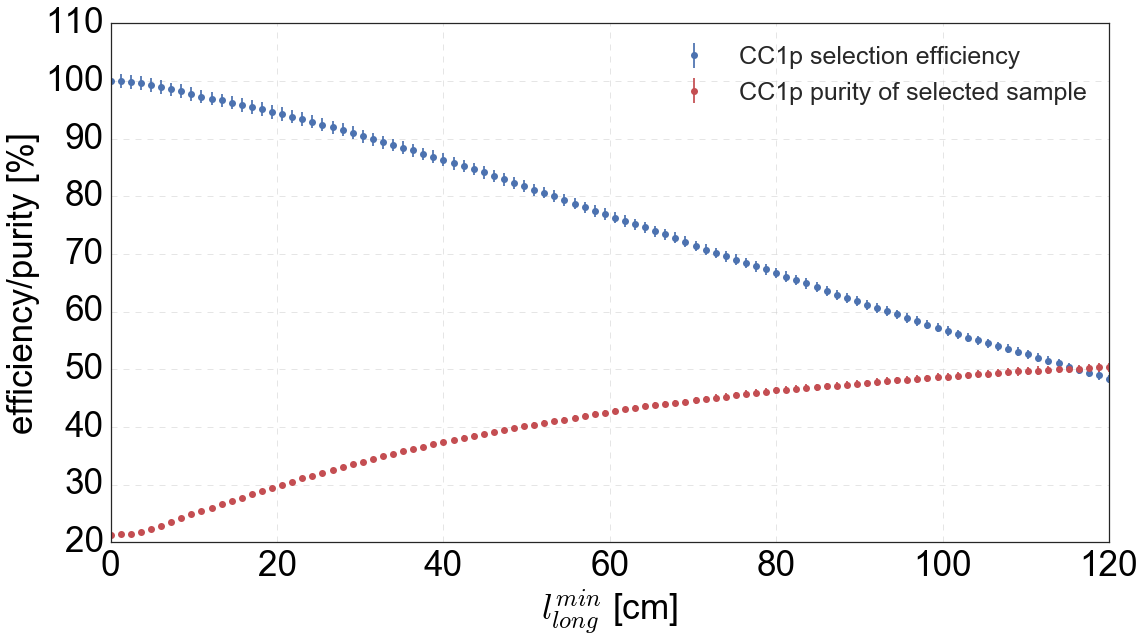

In [39]:
plot_pur_eff (cut_var ='l_long',                  
              cut_type= 'min',              
              x_label = '$l_{long}^{min}$ [cm]',              
              xmin=0.0, xmax=120 , Nbins=100)

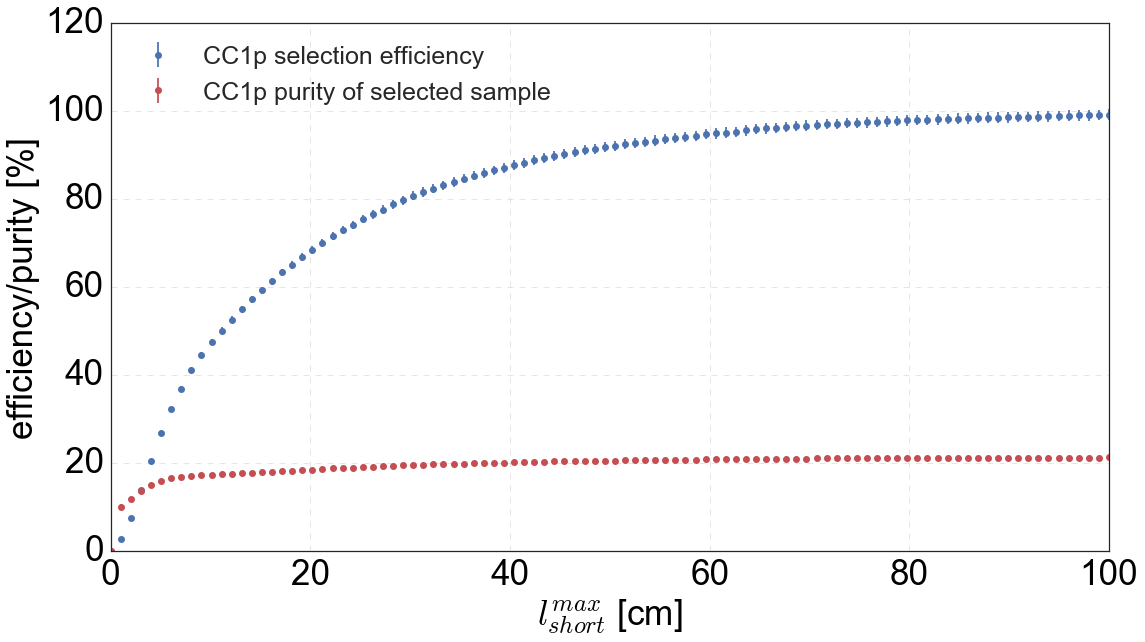

In [43]:
plot_pur_eff (cut_var ='l_short',                  
              cut_type= 'max',
              x_label = '$l_{short}^{max}$ [cm]',              
              xmin=0.0, xmax=100 , Nbins=100)

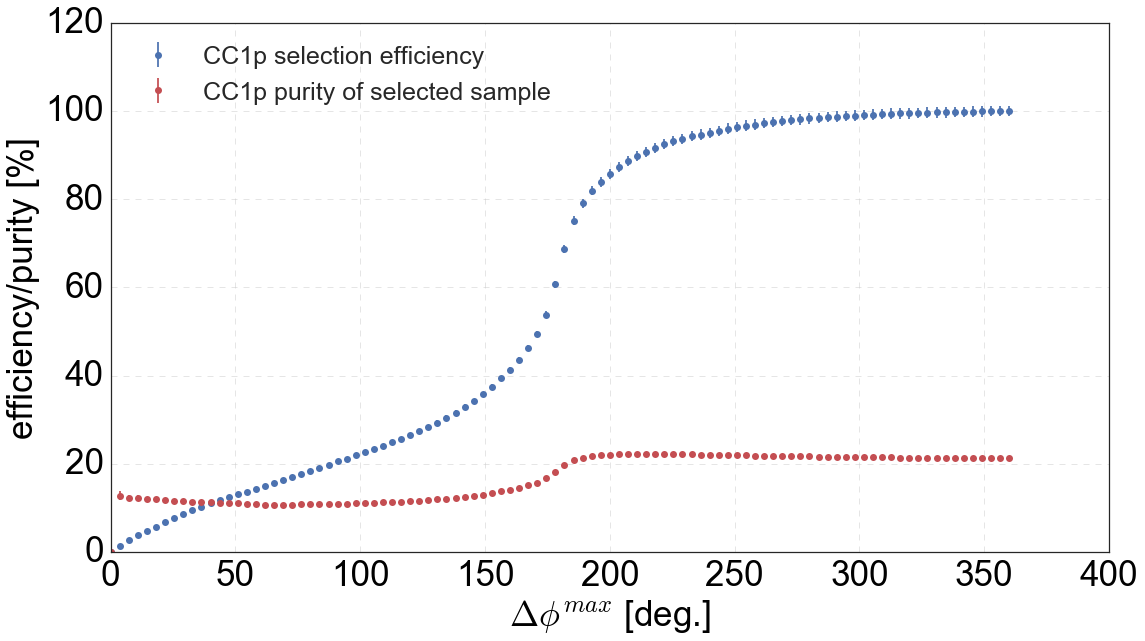

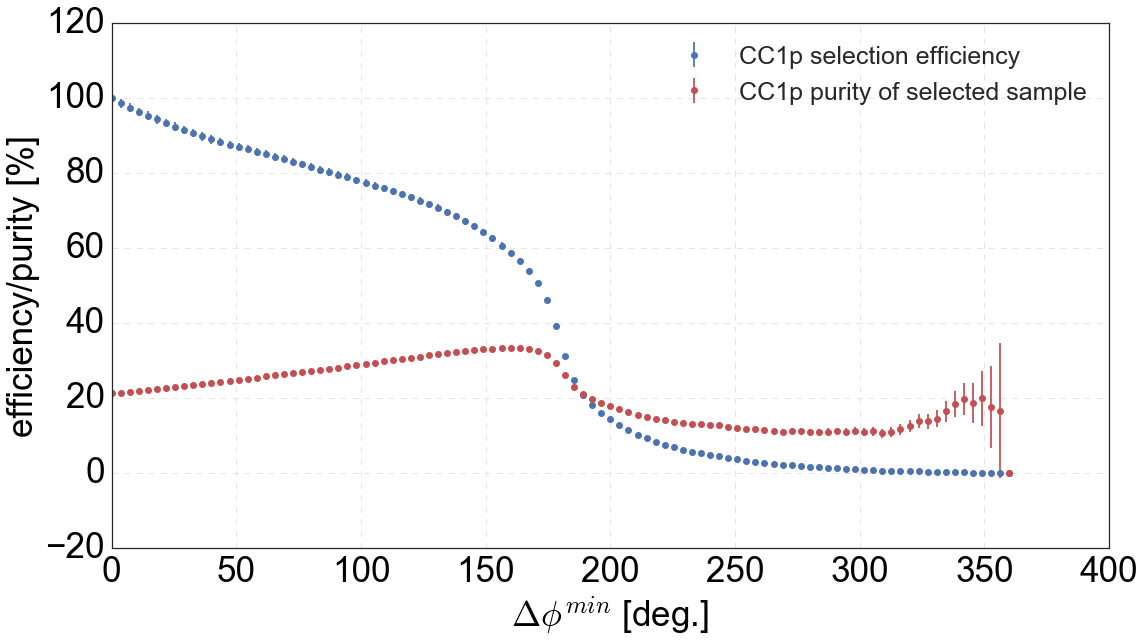

In [46]:
plot_pur_eff (cut_var ='delta_phi',                  
              cut_type= 'max',
              x_label = '$\\Delta \\phi ^{max}$ [deg.]',              
              xmin=0.0, xmax=360 , Nbins=100)
plot_pur_eff (cut_var ='delta_phi',                  
              cut_type= 'min',
              x_label = '$\\Delta \\phi ^{min}$ [deg.]',
              xmin=0.0, xmax=360 , Nbins=100)

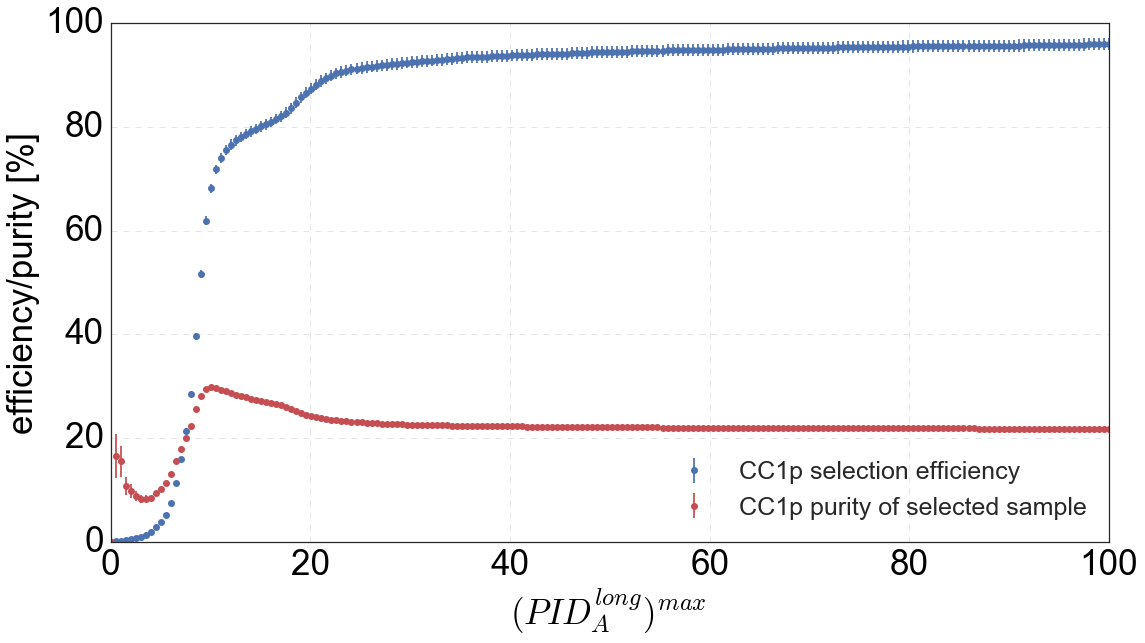

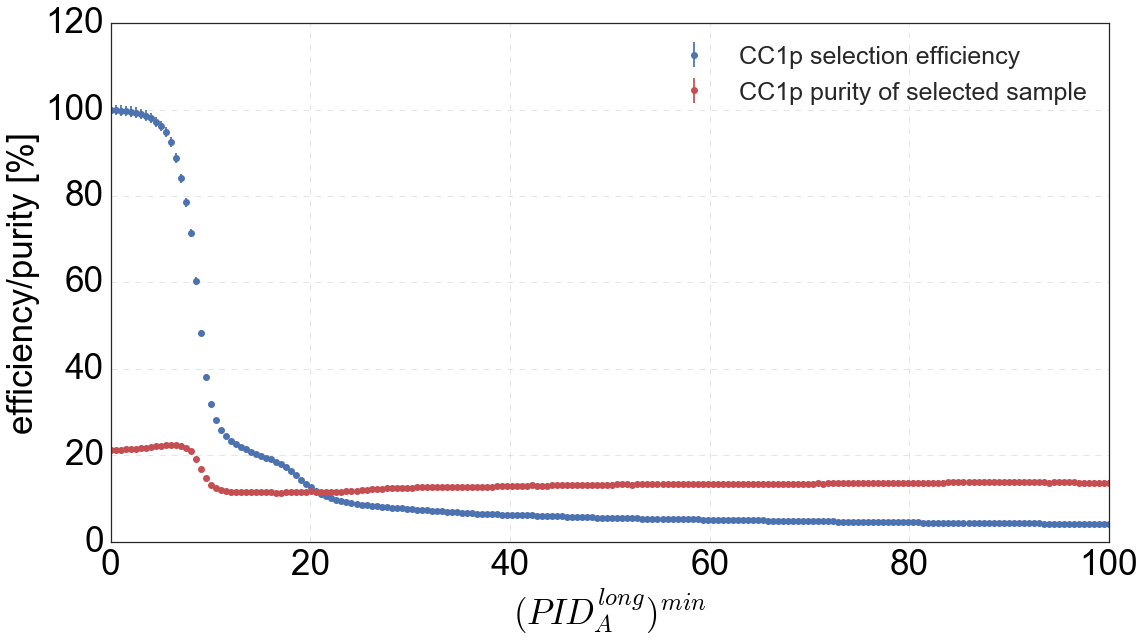

In [52]:
plot_pur_eff (cut_var ='PIDA_long',
              cut_type= 'max',
              x_label = '$(PID_A^{long}) ^{max}$ ',
              xmin=0.0, xmax=100 , Nbins=200)
plot_pur_eff (cut_var ='PIDA_long',             
              cut_type= 'min',
              x_label = '$(PID_A^{long}) ^{min}$',
              xmin=0.0, xmax=100 , Nbins=200)

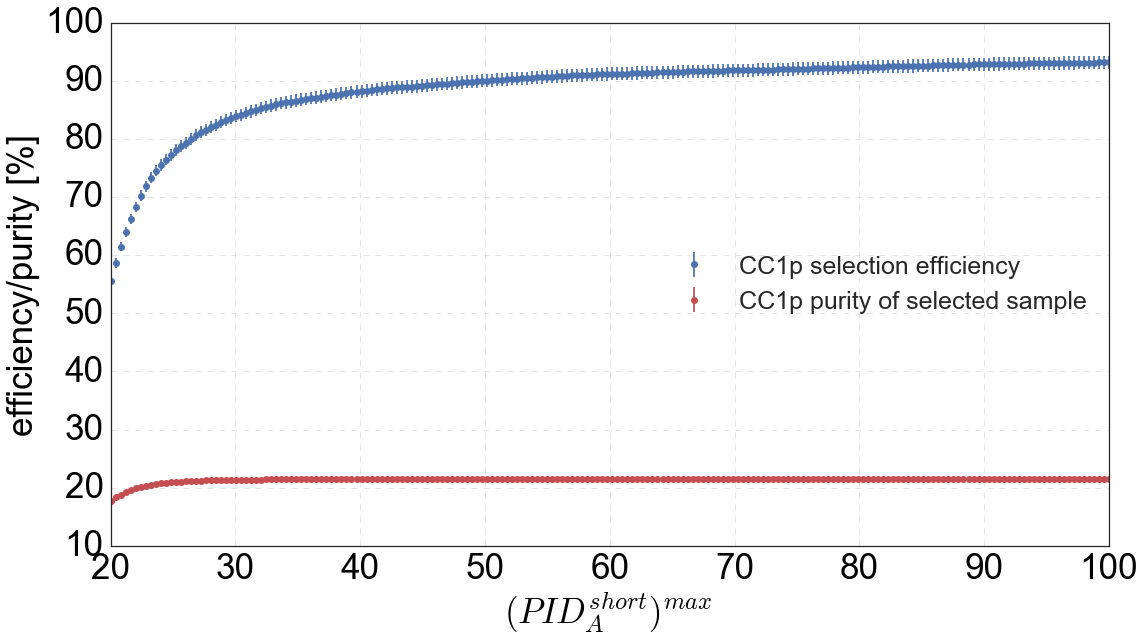

In [57]:
plot_pur_eff (cut_var ='PIDA_short',
              cut_type= 'max',
              x_label = '$(PID_A^{short}) ^{max}$ ',
              xmin=20, xmax=100 , Nbins=200)
plot_pur_eff (cut_var ='PIDA_short',             
              cut_type= 'min',
              x_label = '$(PID_A^{short}) ^{min}$',
              xmin=0.0, xmax=40 , Nbins=100)

# find the golden point for the cuts

In [8]:
cuts_combination_filename = "/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/cuts_combinations.csv"

In [ ]:
dmax = np.linspace(0,10,20)
llongmin = np.linspace(10,80,20)
dphimin = np.linspace(0,150,20)
PIDA_short_min = np.linspace(5,20,20)
PIDA_long_min = np.linspace(0,5,5)

cuts_combinations = pd.DataFrame()

for i,d in zip(range(len(dmax)),dmax):
    print '%.0f'%(100*float(i)/len(dmax))+'%'
    for l in llongmin:        
        for dphi in dphimin:
            for PIDA_smin in PIDA_short_min:
                for PIDA_lmin in PIDA_long_min:
                    
                    reduced_CC1p = truthCC1p[  (truthCC1p['distance']<d) 
                                             & (truthCC1p['l_long']>l)
                                             & (truthCC1p['delta_phi']>dphi)
                                             & (truthCC1p['PIDA_short']>PIDA_smin)
                                             & (truthCC1p['PIDA_long']>PIDA_lmin)
                                            ]
                    reduced_MCevents = MCevents[  (MCevents['distance']<d) 
                                                & (MCevents['l_long']>l)
                                                & (MCevents['delta_phi']>dphi)
                                                & (MCevents['PIDA_short']>PIDA_smin)
                                                & (MCevents['PIDA_long']>PIDA_lmin)                                            
                                               ]
                    reduced_MCevents_trueCC1p = reduced_MCevents[reduced_MCevents['truth_cc1p']==1]

                    
                    den1 = len(truthCC1p) if len(truthCC1p)>0 else 1e20
                    eff = 100.*float(len(reduced_CC1p))/den1 
                    if eff<50: continue
                    den2 = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
                    eff_err = eff*np.sqrt( 1./den1 + 1./den2 )
        
                    den1 = len(reduced_MCevents) if len(reduced_MCevents)>0 else 1e20
                    pur =  100.*float(len(reduced_MCevents_trueCC1p))/den1
                    if pur<20: continue
                    den2 = len(reduced_MCevents_trueCC1p) if len(reduced_MCevents_trueCC1p)>0 else 1e20
                    pur_err = pur*np.sqrt( 1./den1 + 1./den2 ) 

                    cuts_combinations = pd.DataFrame({'distance_max':d,
                                                     'l_long_min':l,
                                                     'delta_phi_min':dphi,
                                                     'PIDA_short_min':PIDA_smin,
                                                     'PIDA_long_min':PIDA_lmin,
                                                      'efficiency':eff,
                                                      'eff_err':eff_err,
                                                      'purity':pur,
                                                      'pur_err':pur_err,
                                                     }
                                                     ,index=[0])

                    stream_dataframe_to_file( cuts_combinations , cuts_combination_filename )

0%


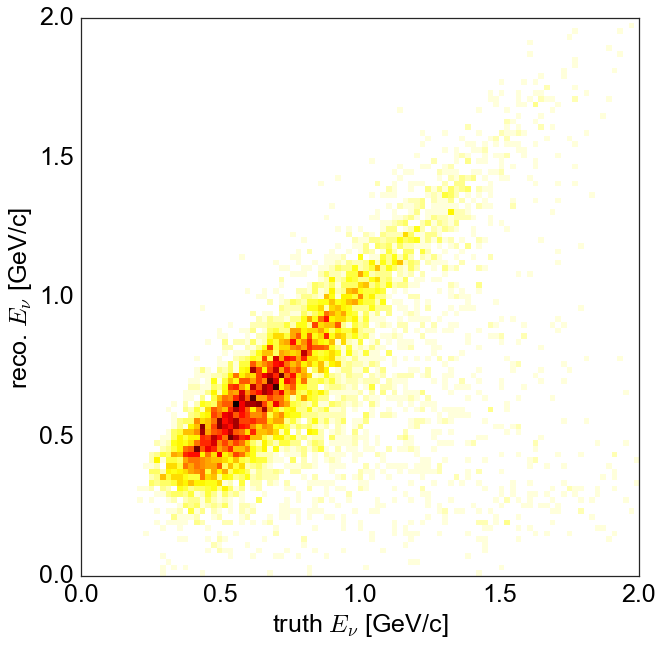

In [247]:
# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pmu , recoGENIECC1p.reco_CC1p_Pmu , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{\\mu}$', ylabel='reco. $p_{\\mu}$',ax=ax);
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_x , recoGENIECC1p.reco_CC1p_Pmu_x , bins=np.linspace(-0.6,0.6,60), xlabel='truth $p_{\\mu}$-x', ylabel='reco. $p_{\\mu}$-x',ax=ax);
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y, bins=np.linspace(-0.6,0.6,60) , xlabel='truth $p_{\\mu}$-y', ylabel='reco. $p_{\\mu}$-y',ax=ax);
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{\\mu}$-z', ylabel='reco. $p_{\\mu}$-z',ax=ax);
# plt.tight_layout()

# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pp , recoGENIECC1p.reco_CC1p_Pp , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{p}$', ylabel='reco. $p_{p}$',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x , bins=np.linspace(-0.8,0.8,60), xlabel='truth $p_{p}$-x', ylabel='reco. $p_{p}$-x',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y, bins=np.linspace(-0.8,0.8,60) , xlabel='truth $p_{p}$-y', ylabel='reco. $p_{p}$-y',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{p}$-z', ylabel='reco. $p_{p}$-z',ax=ax,norm='non' );
# plt.tight_layout()


# plot_2d_hist(recoGENIECC1p.truth_theta_pq , 180-recoGENIECC1p.reco_CC1p_theta_pq , xlabel='truth $\\theta_{p,q}$ [deg.]', ylabel='$\\pi-$ reco. $\\theta_{p,q}$ [deg.]');
plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev , bins=np.linspace(0,2,100), xlabel='truth $E_{\\nu}$ [GeV/c]', ylabel='reco. $E_{\\nu}$ [GeV/c]');




In [9]:
cuts_combinations = pd.read_csv(cuts_combination_filename)
print len(cuts_combinations)

147259


In [15]:
cuts_combinations['eff*pur'] = cuts_combinations['efficiency'] * cuts_combinations['purity']

In [22]:
cuts_combinations[cuts_combinations.index==cuts_combinations[cuts_combinations.efficiency>80]['eff*pur'].argmax()]

,PIDA_long_min,PIDA_short_min,delta_phi_min,distance_max,eff_err,efficiency,l_long_min,pur_err,purity,eff*pur
26,0.0,8.0,0.0,10.0,1.02745,80.6119,35.0,0.517277,45.2536,3647.978678


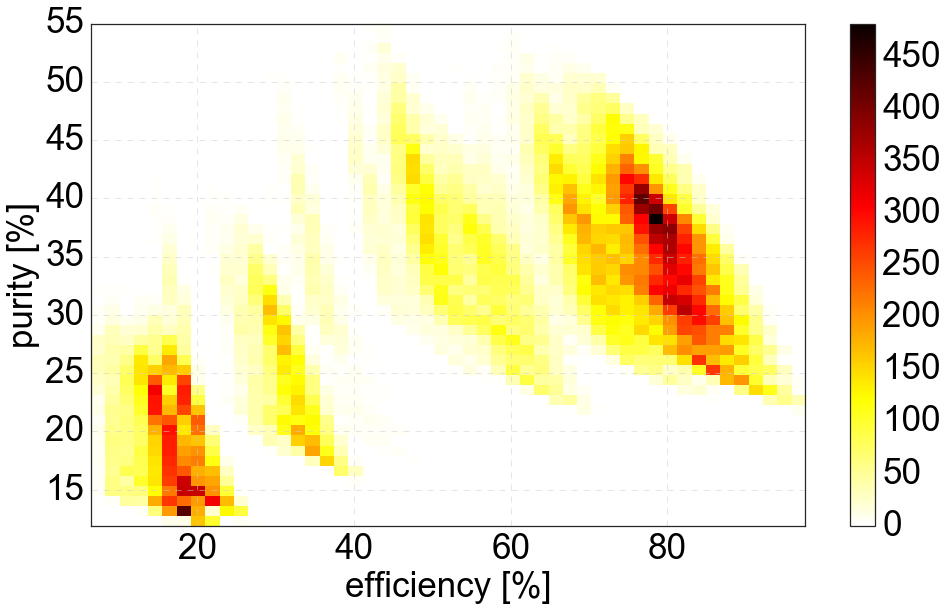

In [75]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=cuts_combinations[cuts_combinations.efficiency>0] , varx='efficiency' , vary='purity' ,fontsize=35,
                  x_label = 'efficiency [%]', y_label='purity [%]',
                  binsx=50, binsy=50, ax=ax )
ax.grid(linestyle='--',alpha=0.5)



In [180]:

# plot_2d_hist(recoGENIECC1p.pdg_large_pida , recoGENIECC1p.pdg_small_pida);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(MCeventsTrueCC1p.pdg_long,MCeventsTrueCC1p.pdg_short);
# plot_2d_hist(recoGENIECC1p.pdg_long,recoGENIECC1p.pdg_short,bins=(np.linspace(0,2220,2220),np.linspace(0,2220,2220)));
# recoGENIECC1p.plot.scatter('pdg_long','pdg_short')
# recoGENIECC1p.plot.scatter('truth_theta_pq','reco_CC1p_theta_pq')
# recoGENIECC1p.plot.scatter('l_long','pdg_long')
# recoGENIECC1p.plot.scatter('l_short','pdg_short')
# recoGENIECC1p.plot.scatter('l_large_pida','pdg_large_pida')
# recoGENIECC1p.plot.scatter('l_small_pida','pdg_small_pida')
# recoGENIECC1p.plot.hexbin('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_muon','l_short')
# plt.hist(recoGENIECC1p.l_long - recoGENIECC1p.l_short);
# plt.hist(recoGENIECC1p.l_small_pida - recoGENIECC1p.l_large_pida);
# plt.hist(recoGENIECC1p.PIDA_large_pida - recoGENIECC1p.PIDA_small_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_large_pida, recoGENIECC1p.l_large_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_small_pida, recoGENIECC1p.l_small_pida , bins=np.linspace(0,300,100) );
# plot_2d_hist(recoGENIECC1p.truth_P_muon , recoGENIECC1p.reco_CC1p_Pmu ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_P_proton , recoGENIECC1p.reco_CC1p_Pp ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev );
# plot_2d_hist(recoGENIECC1p.truth_q , recoGENIECC1p.reco_CC1p_q );
# plot_2d_hist(recoGENIECC1p.truth_q_x , recoGENIECC1p.reco_CC1p_q_x );
# plot_2d_hist(recoGENIECC1p.truth_q_y , recoGENIECC1p.reco_CC1p_q_y );
# plot_2d_hist(recoGENIECC1p.truth_q_z , recoGENIECC1p.reco_CC1p_q_z );
# recoGENIECC1p.plot.scatter('truth_Pmu_y','reco_CC1p_Pmu_y')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==0].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# plot_2d_hist(recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].truth_Pmu_x , recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].reco_CC1p_Pmu_x );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z );
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x );
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y );
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z );

# true CC1p pairs - plots, for enhanecemnt of CC1p search

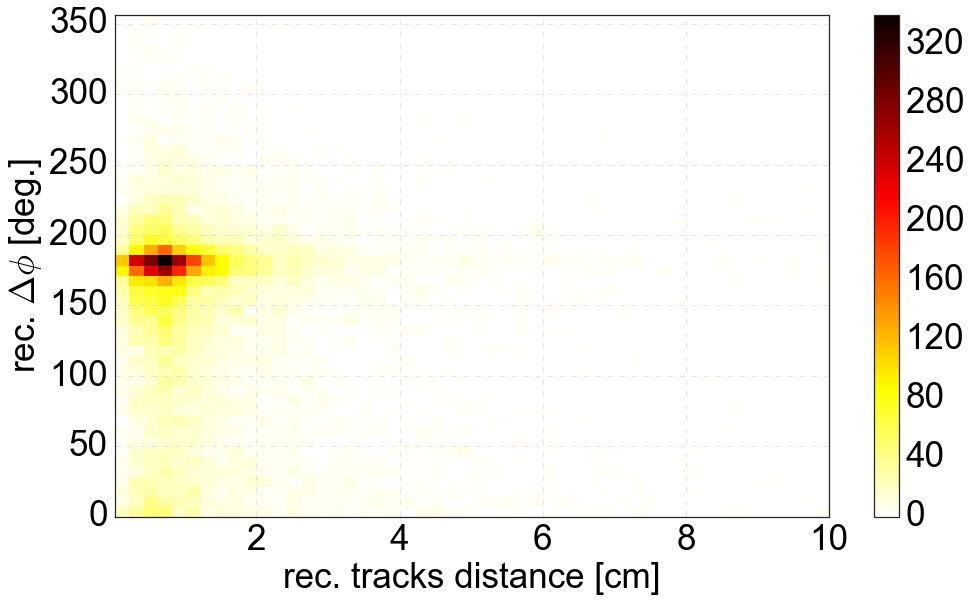

In [22]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=truthCC1p , varx='distance' , vary='delta_phi' ,fontsize=35,
                  x_label = 'rec. tracks distance [cm]', y_label='rec. $\\Delta \\phi$ [deg.]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)


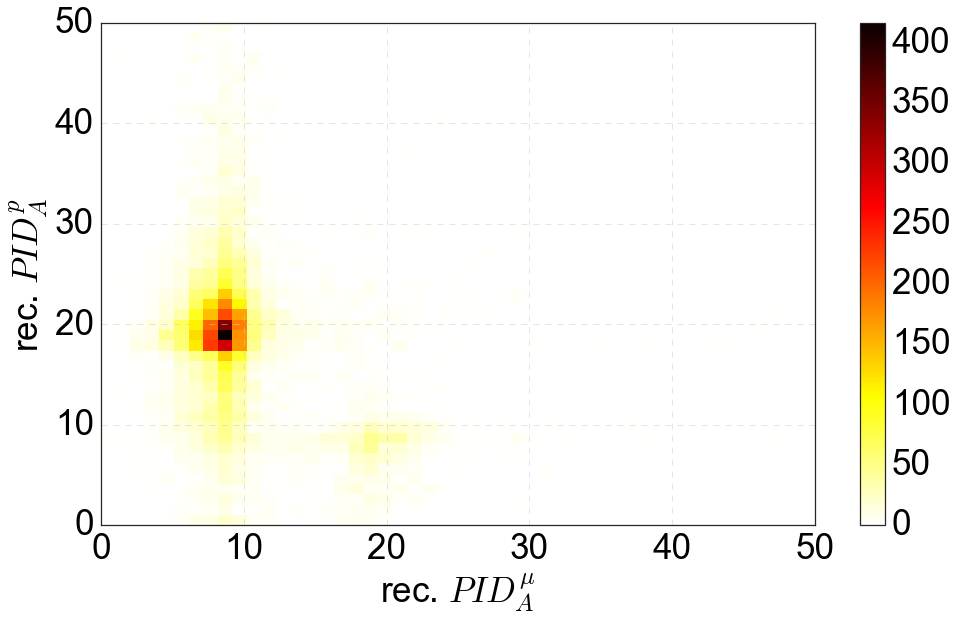

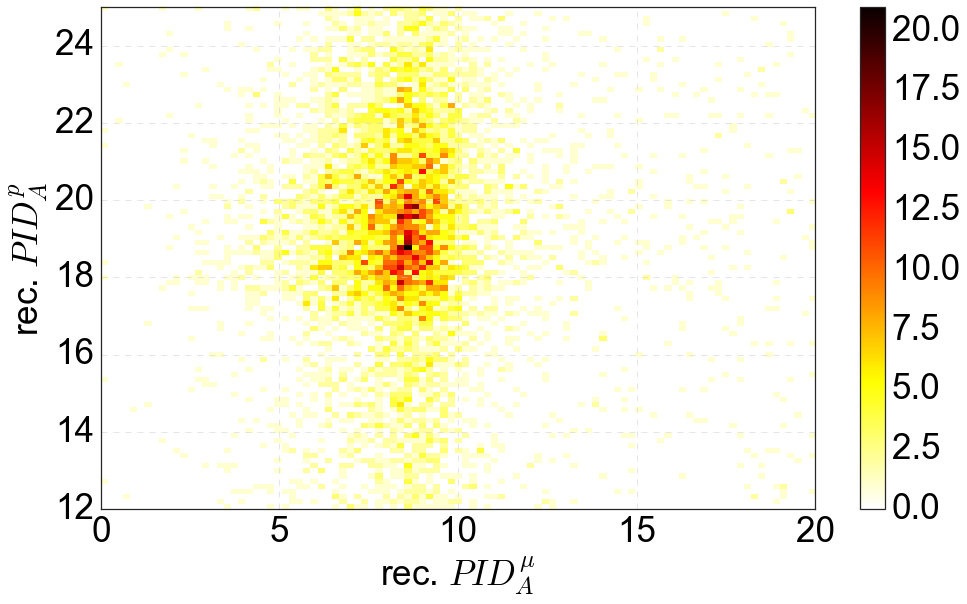

In [157]:
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='PIDA_muon' , vary='PIDA_proton' ,fontsize=35,
                  x_label = 'rec. $PID_A^{\\mu}$', y_label='rec. $PID_A^{p}$',
                  binsx=np.linspace(0,50,50), binsy=np.linspace(0,50,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',which='both',alpha=0.5)
# zoomin
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='PIDA_muon' , vary='PIDA_proton' ,fontsize=35,
                  x_label = 'rec. $PID_A^{\\mu}$', y_label='rec. $PID_A^{p}$',
                  binsx=np.linspace(0,20,100), binsy=np.linspace(12,25,100), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',which='both',alpha=0.5)

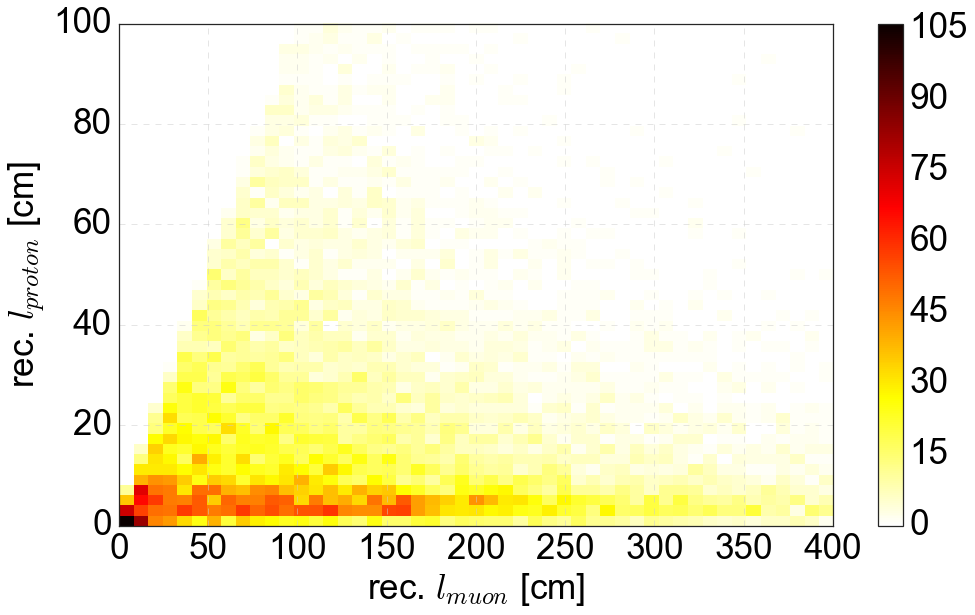

In [5]:
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='l_muon' , vary='l_proton' ,fontsize=35,
                  x_label = 'rec. $l_{muon}$ [cm]', y_label='rec. $l_{proton}$ [cm]',
                  binsx=np.linspace(0,400,50), binsy=np.linspace(0,100,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)